## ***Importing the necessary libraries***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## ***Reading data***

#### We add *low_memory=False* while reading the data in order to recover all the lines of the file instead of truncating them to save memory space.

In [ ]:
data = pd.read_csv("malware.csv", low_memory=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100213 entries, 0 to 100212
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   MachineIdentifier                                  100213 non-null  object 
 1   ProductName                                        100213 non-null  object 
 2   EngineVersion                                      100213 non-null  object 
 3   AppVersion                                         100213 non-null  object 
 4   AvSigVersion                                       100213 non-null  object 
 5   IsBeta                                             100213 non-null  int64  
 6   RtpStateBitfield                                   99851 non-null   float64
 7   IsSxsPassiveMode                                   100213 non-null  int64  
 8   DefaultBrowsersIdentifier                          4899 non-null    float6

## ***Data exploration***

In [ ]:
# Let's display the number of Rows and Columns of our data
data.shape

(100213, 83)

In [ ]:
# Let's display the first 5 lines of our data
data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,2341.0,NaN,476940.0,HDD,299451.0,0.0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Professional,PROFESSIONAL,UUPUpgrade,26.0,119.0,UNKNOWN,0.0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,10.0,0.0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,2405.0,NaN,476940.0,HDD,102385.0,0.0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134.0,1.0,Professional,PROFESSIONAL,IBSClean,8.0,31.0,UNKNOWN,0.0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,8.0,0.0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,1972.0,NaN,114473.0,SSD,113907.0,0.0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134.0,165.0,Core,CORE,UUPUpgrade,7.0,30.0,FullAuto,0.0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,2273.0,NaN,238475.0,UNKNOWN,227116.0,0.0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.171

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


stats = []
for col in data.columns:
    stats.append((col, data[col].dtype,data[col].dropna().nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100))

stats_df = pd.DataFrame(stats, columns=['Feature', "type", 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category'])

stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,type,Unique_values,Percentage of missing values,Percentage of values in the biggest category
28,PuaMode,object,1,99.969066,99.969066
41,Census_ProcessorClass,object,3,99.573908,99.573908
8,DefaultBrowsersIdentifier,float64,288,95.111413,95.111413
68,Census_IsFlightingInternal,float64,1,83.169848,83.169848
52,Census_InternalBatteryType,object,22,71.241256,71.241256
71,Census_ThresholdOptIn,float64,2,63.740233,63.740233
75,Census_IsWIMBootEnabled,float64,1,63.661401,63.661401
31,SmartScreen,object,11,35.739874,48.280163
15,OrganizationIdentifier,float64,37,30.673665,47.139593
29,SMode,float64,2,5.929370,94.037700


#### The code in the cell above allowed us to display in table form the columns of our data ordered in descending order of percentage of missing values ​​(NaN values). we can also see the types of each column, its number of unique values ​​and its number. There is also the *Percentage of values ​​in largest category* which gives the percentage of values ​​belonging to a single category in the column.

### Let's display columns with more than 90% missing values ​​which we will remove later

In [ ]:
# Determine columns with more than 90% missing values
cols_to_drop = []
for col in data.columns:
    if data[col].isnull().sum() / data.shape[0] > 0.90:
        cols_to_drop.append(col)
# Show columns to delete
print("Columns to delete:",cols_to_drop)

Columns to delete: ['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass']


### Let's display the columns with zero variace which we will remove later as wel

In [ ]:
# Check for columns with zero variance
zero_variance_cols = [col for col in data.columns if data[col].nunique() == 1]

# Print the columns with zero variance
print("Columns with zero variance:", zero_variance_cols)

Columns with zero variance: ['IsBeta', 'PuaMode', 'Census_IsFlightingInternal', 'Census_IsFlightsDisabled', 'Census_IsWIMBootEnabled']


### Let's display the columns with a category representing more than 90% of the values ​​which we will delete later too

In [ ]:
# Calculate the percentage of each category in each column
category_percentage = data.apply(lambda x: x.value_counts(normalize=True).max(), axis=0)

# Select columns where a category represents more than 90% of the values
imbalanced_columns = category_percentage[category_percentage > 0.9].index.tolist()

# Show unbalanced columns
print("Unbalanced columns with one category representing more than 90% of the values: \n", imbalanced_columns)

Unbalanced columns with one category representing more than 90% of the values: 
 ['ProductName', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductsEnabled', 'HasTpm', 'Platform', 'Processor', 'OsVer', 'IsProtected', 'AutoSampleOptIn', 'PuaMode', 'SMode', 'Firewall', 'UacLuaenable', 'Census_DeviceFamily', 'Census_HasOpticalDiskDrive', 'Census_OSArchitecture', 'Census_IsPortableOperatingSystem', 'Census_IsFlightingInternal', 'Census_IsFlightsDisabled', 'Census_FlightRing', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled', 'Census_IsVirtualDevice', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable']


### Let's display the possible values ​​that each column can have excluding empty values ​​represented by *nan*

In [ ]:
for column in imbalanced_columns :
    print("Valeurs Uniques de", column, ":", data[column].dropna().unique())

Valeurs Uniques de ProductName : ['win8defender' 'mse']
Valeurs Uniques de IsBeta : [0]
Valeurs Uniques de RtpStateBitfield : [7. 0. 3. 5. 8. 1.]
Valeurs Uniques de IsSxsPassiveMode : [0 1]
Valeurs Uniques de AVProductsEnabled : [1. 2. 0. 4. 3.]
Valeurs Uniques de HasTpm : [1 0]
Valeurs Uniques de Platform : ['windows10' 'windows7' 'windows8' 'windows2016']
Valeurs Uniques de Processor : ['x64' 'arm64' 'x86']
Valeurs Uniques de OsVer : ['10.0.0.0' '6.1.1.0' '6.3.0.0' '10.0.1.44' '6.1.0.0' '6.3.1.0' '6.1.3.0'
 '10.0.3.0' '10.0.1.0' '10.0.32.72' '10.0.2.0']
Valeurs Uniques de IsProtected : [1. 0.]
Valeurs Uniques de AutoSampleOptIn : [0 1]
Valeurs Uniques de PuaMode : ['on']
Valeurs Uniques de SMode : [0. 1.]
Valeurs Uniques de Firewall : [1. 0.]
Valeurs Uniques de UacLuaenable : [ 1.  0. 48.]
Valeurs Uniques de Census_DeviceFamily : ['Windows.Desktop' 'Windows.Server']
Valeurs Uniques de Census_HasOpticalDiskDrive : [0. 1.]
Valeurs Uniques de Census_OSArchitecture : ['amd64' 'arm64' 'x8

### We see that several columns like *IsBeta, **PuaMode* have unique values ​​of size 1. These columns will not provide us with information when training our model so we will delete them.

## ***Data cleaning***

In [ ]:
# Removing columns with 90% of missing values
data = data.drop(columns = ["PuaMode","Census_ProcessorClass","DefaultBrowsersIdentifier","Census_IsWIMBootEnabled"])

#### Columns with zero variance also appear among those that are unbalanced, so we will remove them together. However, we will only delete a few columns (17) which we find irrelevant in the training of our model

In [ ]:
columns_to_drop = ['ProductName', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
                   'AutoSampleOptIn', 'SMode', 'UacLuaenable',
                   'Census_DeviceFamily',
                   'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled',
                   'Census_FlightRing', 'Census_ThresholdOptIn',
                   'Census_IsVirtualDevice', 'Census_IsPenCapable',
                   'Census_IsAlwaysOnAlwaysConnectedCapable']

data = data.drop(columns=columns_to_drop)

#### Let's also remove the "Census_InternalBatteryType" column because it has 71.24% missing values ​​and we judge it to be unimportant since Battery Type does not play a big role in the presence of malware in a computer.

In [ ]:
# Remove the "Census_InternalBatteryType" column
data = data.drop(columns=["Census_InternalBatteryType"])

#### Let's display then finally delete the columns having a single unique value excluding *no*.

In [ ]:
col_a_valeur_unique = [col for col in data.columns if data[col].dropna().nunique() == 1]
col_a_valeur_unique

['Census_IsFlightingInternal']

In [ ]:
# Remove the "Census_IsFlightingInternal" column
data = data.drop(columns=["Census_IsFlightingInternal"])

In [ ]:
data.shape

(100213, 62)

### let's explore the statistics of the dataset

In [ ]:
data.describe()

,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,IeVerIdentifier,Firewall,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,99818.000000,99818.000000,99818.000000,100213.000000,100213.000000,96587.000000,69474.000000,100212.000000,100213.000000,100213.000000,100213.000000,99820.000000,99548.000000,99126.000000,99145.000000,99053.000000,99725.000000,99725.00000,99724.000000,9.959000e+04,9.959000e+04,100203.000000,99277.000000,99673.000000,99674.000000,99674.000000,9.714700e+04,100203.000000,100203.000000,99517.000000,100203.000000,98108.000000,98363.000000,100203.000000,100203.000000,96779.000000,96779.000000,100203.000000
mean,47877.013064,1.322868,1.019976,0.987267,108.188179,81076.257840,24.885324,169.893077,123.110405,15720.393003,574.438416,0.944861,126.596767,0.977332,2216.777941,239096.642424,3.988859,4.53078,2370.716788,5.128945e+05,3.771392e+05,0.075846,6114.403669,16.706615,1548.289062,897.935821,1.128840e+09,15834.895682,969.830354,14.621904,60.505544,401.682615,33050.142411,0.484985,0.125415,0.281662,7.850226,0.499346
std,14022.217118,0.519519,0.162881,0.112120,62.983003,48937.730798,5.642397,89.267339,69.536240,2191.830959,248.257605,0.228253,42.642562,0.148844,1317.944485,72035.949516,2.064551,1.28797,841.512844,3.629538e+05,3.315165e+05,0.264753,5144.762043,6.002234,365.096623,213.333467,1.890526e+09,1960.288322,2920.903271,10.205229,45.019238,221.670173,21224.900669,0.499777,0.331191,0.449812,4.565613,0.500002
min,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,1.000000,7600.000000,16.000000,0.000000,1.000000,0.000000,74.000000,23.000000,1.000000,1.00000,10.000000,1.068000e+04,1.012900e+04,0.000000,512.000000,4.900000,-1.000000,-1.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.000000,9.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,49480.000000,1.000000,1.000000,1.000000,51.000000,36366.000000,18.000000,89.000000,74.000000,15063.000000,256.000000,1.000000,111.000000,1.000000,1443.000000,189608.000000,2.000000,5.00000,1998.000000,2.384750e+05,1.207410e+05,0.000000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,15063.000000,165.000000,8.000000,31.000000,142.000000,13153.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,27.000000,181.000000,88.000000,16299.000000,768.000000,1.000000,117.000000,1.000000,2102.000000,247458.000000,4.000000,5.00000,2500.000000,4.769400e+05,2.494340e+05,0.000000,4096.000000,15.500000,1366.000000,768.000000,0.000000e+00,16299.000000,285.000000,9.000000,34.000000,500.000000,33070.000000,0.000000,0.000000,0.000000,10.000000,0.000000
75%,53447.000000,2.000000,1.000000,1.000000,162.000000,123610.000000,27.000000,267.000000,182.000000,17134.000000,768.000000,1.000000,137.000000,1.000000,2668.000000,304935.000000,4.000000,5.00000,2874.000000,9.538690e+05,4.759678e+05,0.000000,8192.000000,17.300000,1920.000000,1080.000000,4.294967e+09,17134.000000,547.000000,20.000000,92.000000,556.000000,52458.000000,1.000000,0.000000,1.000000,11.000000,1.000000
max,70486.000000,5.000000,4.000000,1.000000,222.000000,167953.000000,52.000000,295.000000,283.000000,182

### We now have 62 columns and 100213 rows of data.

### Let's do a final check of the columns with missing values.

In [ ]:
stats = []
for col in data.columns:
    stats.append((col, data[col].dtype,data[col].dropna().nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100))

stats_df = pd.DataFrame(stats, columns=['Feature', "type", 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category'])

stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,type,Unique_values,Percentage of missing values,Percentage of values in the biggest category
23,SmartScreen,object,11,35.739874,48.280163
10,OrganizationIdentifier,float64,37,30.673665,47.139593
9,CityIdentifier,float64,15827,3.618293,3.618293
60,Wdft_RegionIdentifier,float64,15,3.426701,20.203966
59,Wdft_IsGamer,float64,2,3.426701,69.372237
41,Census_InternalBatteryNumberOfCharges,float64,1794,3.059483,56.418828
55,Census_FirmwareManufacturerIdentifier,float64,172,2.100526,30.455131
56,Census_FirmwareVersionIdentifier,float64,12467,1.846068,1.846068
27,Census_OEMModelIdentifier,float64,16283,1.157534,3.419716
24,Firewall,float64,2,1.084690,96.673086


#### The column with the largest percentage of missing values ​​is now "SmartScreen" with 35.74%. This seems acceptable.


## ***Checking if the target variable is balanced***

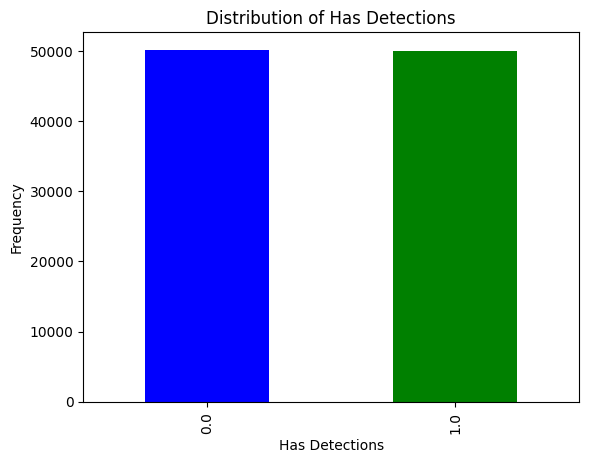

In [ ]:
# Get the counts of 'HasDetections'
counts = data["HasDetections"].value_counts()

# Plotting the histogram with two bars in different colors
counts.plot(kind='bar', color=['blue', 'green'])

# Adding labels and title
plt.xlabel('Has Detections')
plt.ylabel('Frequency')
plt.title('Distribution of Has Detections')

# Display the plot
plt.show()

### Interpretation: The number of machines affected by malware is identical to those unaffected. The data is balanced.

## ***Feature engineering***

### Feature Engineering for us will consist of Replacing the missing values ​​of the non-binary *Float* and *Int* type columns with the average of the existing values.

### But for columns of type *Object* (character string) and *Binary* columns, we will distribute the existing values ​​to the missing values ​​so as to keep a distribution of the values ​​of these columns after feature engineering to that before feature engineering.

### But let's first delete the empty lines from our target column *HasDetections* because we risk creating a new category for the column corresponding to the average (around 0.49) of the already existing values ​​which are 1.0 and 0.0

In [ ]:
data = data.dropna(subset=["HasDetections"])

In [ ]:
data.shape

(100203, 62)

#### We now have 100203 lines instead of 100213. The deletion has therefore been effective. Now let’s do the Feature Engineering.

### Let's explore the proportions of data types of columns in our data after dropping the unnecessary ones.

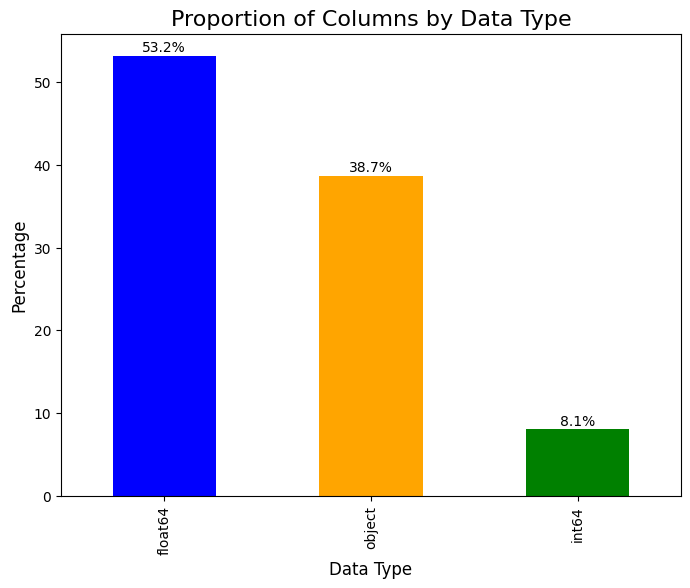

In [ ]:
# Get the count of columns by data type
column_counts = data.dtypes.value_counts()

# Calculate the proportion of columns by data type
column_proportions = column_counts / len(data.columns) * 100

# Define colors for each data type
colors = ['blue', 'orange', 'green']

# Plotting the proportions of columns by data type
plt.figure(figsize=(8, 6))
column_proportions.plot(kind='bar', color=colors)
plt.title('Proportion of Columns by Data Type', fontsize=16)
plt.xlabel('Data Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Adding percentages on top of each bar
for i, proportion in enumerate(column_proportions):
    plt.text(i, proportion + 0.5, f'{proportion:.1f}%', ha='center', fontsize=10)

plt.show()

In [ ]:
# Let's count the binary columns
col_binary = [ col for col in data.columns if data[col].dropna().nunique() == 2 and data[col].dtype != "object"]
print("Les colonnes binaires: \n",col_binary)
print("Nombre de colonnes binaires: \n", len(col_binary))

Les colonnes binaires: 
 ['HasTpm', 'IsProtected', 'Firewall', 'Census_HasOpticalDiskDrive', 'Census_IsSecureBootEnabled', 'Census_IsTouchEnabled', 'Wdft_IsGamer', 'HasDetections']
Nombre de colonnes binaires: 
 8


#### Feature Engineering For non-Binary Float and Int columns

In [ ]:
columns_null = [column for column in data.columns[data.isnull().any()]]
for col in columns_null:
    if data[col].dtype in ["float64", "int64"] and col not in col_binary:
        data[col] = data[col].fillna(data[col].mean())

In [ ]:
stats = []
for col in data.columns:
    stats.append((col, data[col].dtype,data[col].dropna().nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100))

stats_df = pd.DataFrame(stats, columns=['Feature', "type", 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category'])

stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,type,Unique_values,Percentage of missing values,Percentage of values in the biggest category
23,SmartScreen,object,9,35.743441,48.284981
59,Wdft_IsGamer,float64,2,3.417063,69.379160
24,Firewall,float64,2,1.074818,96.682734
21,IsProtected,float64,2,0.392204,94.114947
32,Census_PrimaryDiskTypeName,object,4,0.160674,64.787481
36,Census_ChassisTypeName,object,30,0.005988,58.793649
19,OsBuildLab,object,369,0.000998,41.053661
43,Census_OSArchitecture,object,3,0.000000,90.937397
42,Census_OSVersion,object,260,0.000000,15.714100
40,Census_PowerPlatformRoleName,object,9,0.000000,69.261399


#### We see by checking the table above that the number of columns with missing values ​​has drastically decreased and only 7 remain.

In [ ]:
# Non-manual or visual verification
columns_null = [column for column in data.columns[data.isnull().any()]]
print(columns_null)
len(columns_null)

['OsBuildLab', 'IsProtected', 'SmartScreen', 'Firewall', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Wdft_IsGamer']


7

## ***Observing Object and Binary column value distributions***

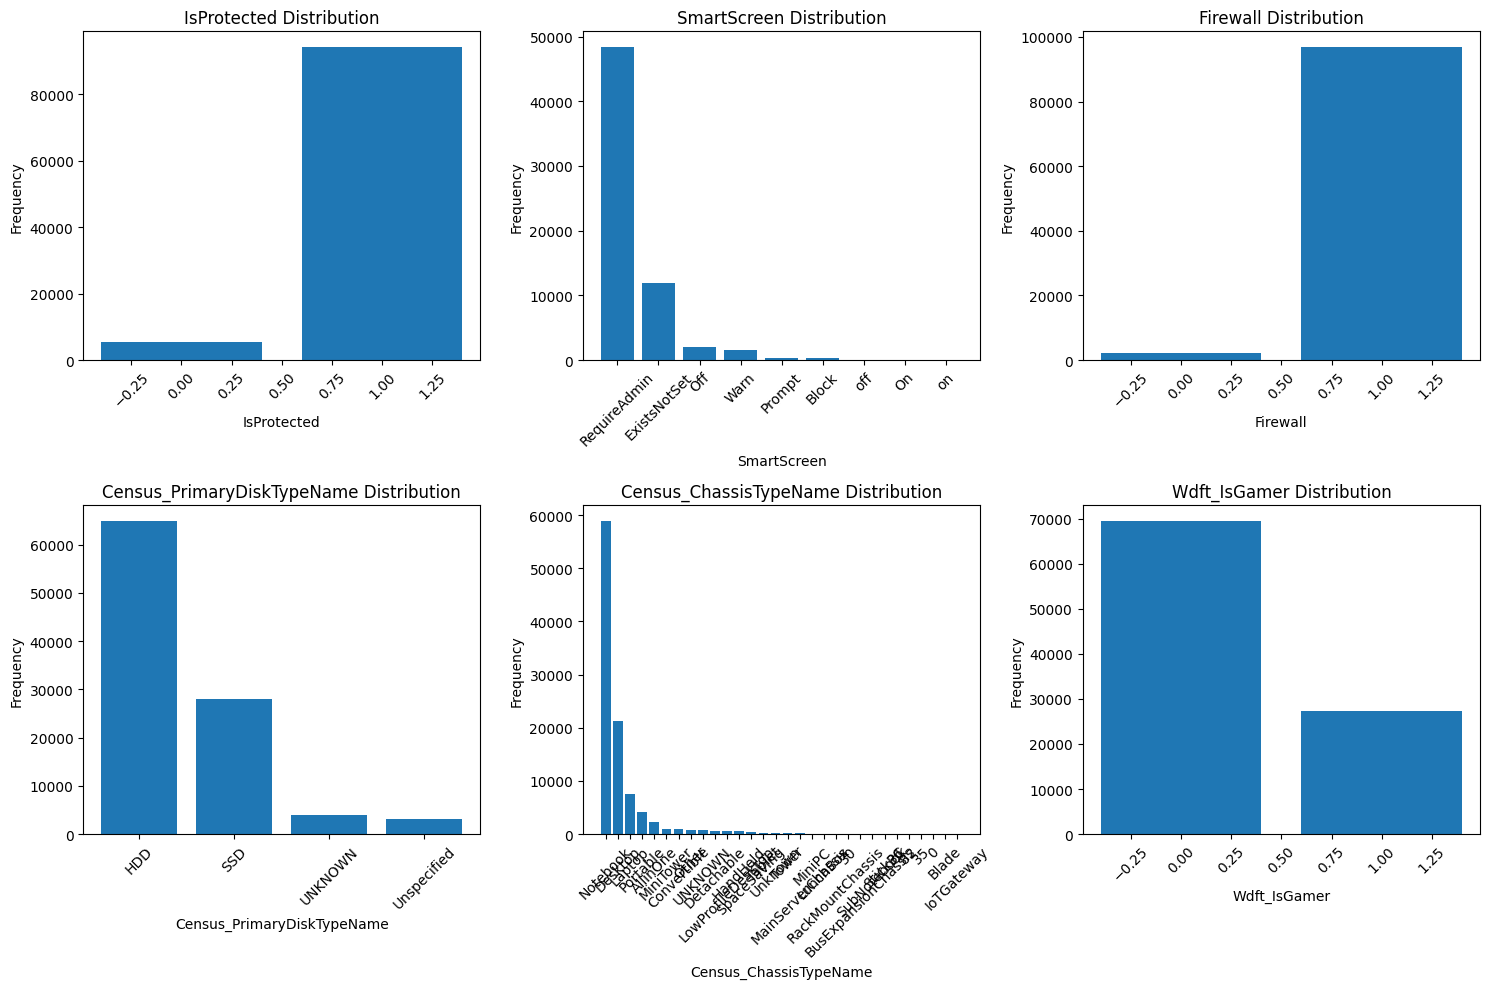

In [ ]:
# List of columns
columns = ['IsProtected', 'SmartScreen', 'Firewall',
           'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Wdft_IsGamer']

# Calculate the number of rows needed based on the number of columns and desired plots per row
num_rows = len(columns) // 3 + (len(columns) % 3 > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows*5))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns):
    # Count the frequency of each unique value in the column
    counts = data[col].value_counts()

    # Plot the histogram
    axes[i].bar(counts.index, counts.values)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"{col} Distribution")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove empty subplot(s)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Application of Feature Engineering

In [ ]:
# Function to fill missing values ​​keeping the same distribution
def remplir_valeurs_manquantes(colonne):
    # Calculate frequencies of values ​​in column
    freq_valeurs = colonne.value_counts(normalize=True)
    # Generate an array of values ​​with the same proportions
    valeurs_remplies = np.random.choice(freq_valeurs.index, size=colonne.isnull().sum(), p=freq_valeurs.values)
    # Create a copy of the column to avoid the warnin
    colonne_copy = colonne.copy()
    # Replace missing values ​​with generated values
    colonne_copy[colonne.isnull()] = valeurs_remplies
    return colonne_copy

# List of columns with missing values
columns_null = [column for column in data.columns[data.isnull().any()]]

# Fill in missing values ​​in each column
for colonne in columns_null:
    data[colonne] = remplir_valeurs_manquantes(data[colonne])

### Let's observe the distribution of the values ​​of some columns of type *Object* and *Binary* after Application of Feauture Engineering.

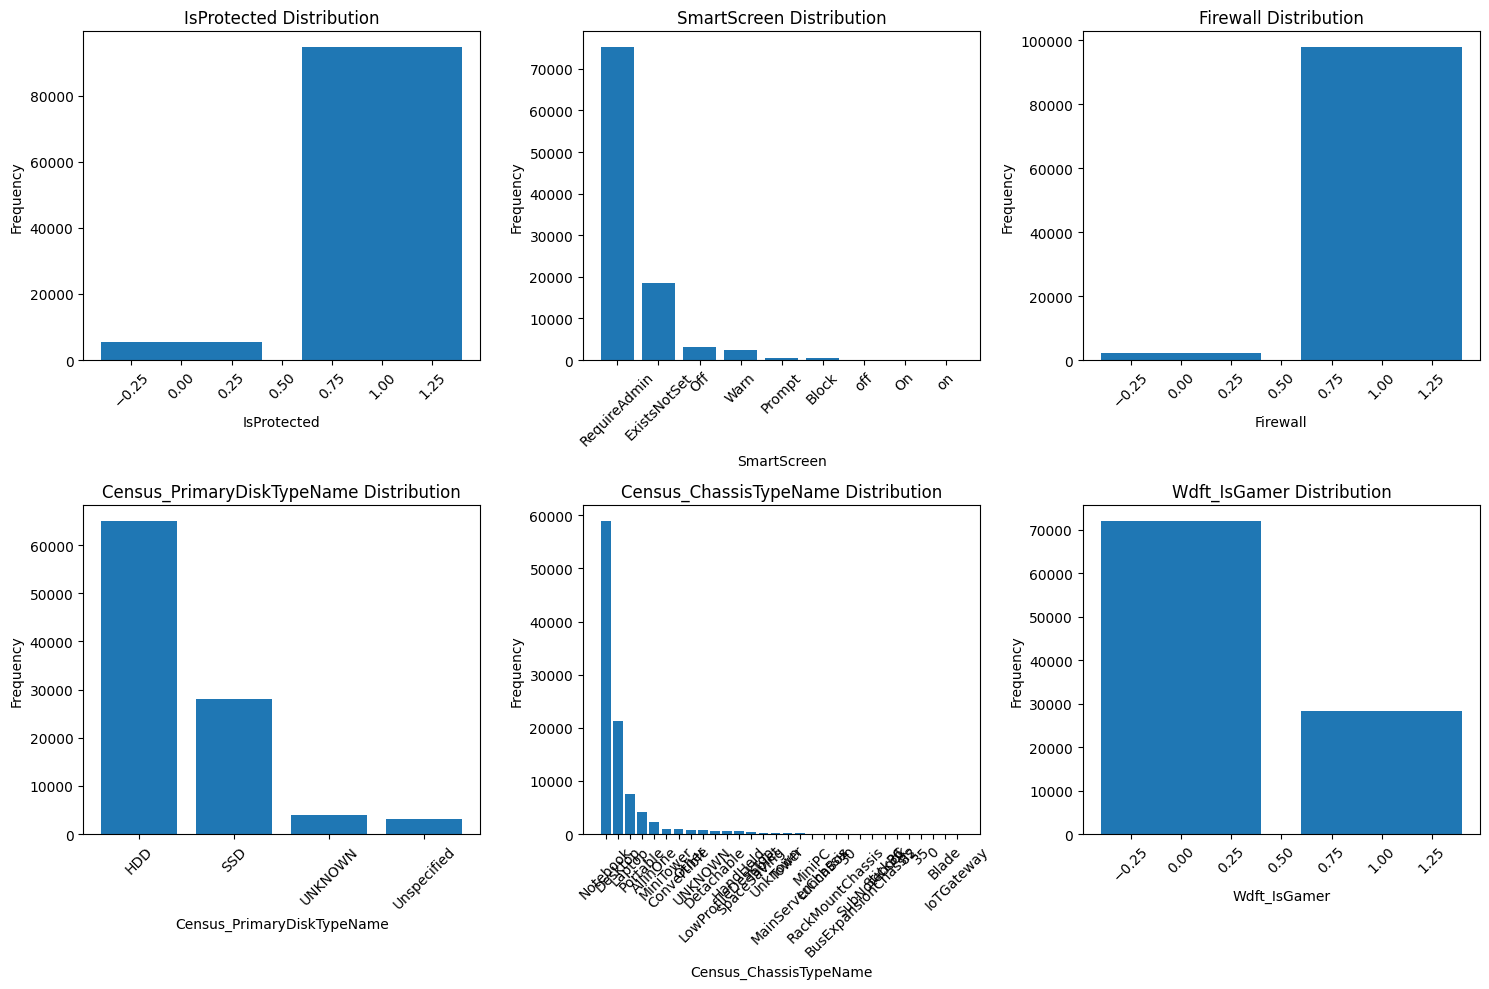

In [ ]:
# List of columns
columns = ['IsProtected', 'SmartScreen', 'Firewall',
           'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Wdft_IsGamer']

# Calculate the number of rows needed based on the number of columns and desired plots per row
num_rows = len(columns) // 3 + (len(columns) % 3 > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows*5))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns):
    # Count the frequency of each unique value in the column
    counts = data[col].value_counts()

    # Plot the histogram
    axes[i].bar(counts.index, counts.values)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"{col} Distribution")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove empty subplot(s)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### We can clearly see that the distributions before and after Feature Engineering are identical apart from the amplitudes which differ. This is explained by the fact that the zero values ​​of the columns were replaced by random values ​​extracted from the existing values ​​of the columns , thus maintaining the same overall data distribution while ensuring consistent statistical integrity.

In [ ]:
stats = []
for col in data.columns:
    stats.append((col, data[col].dtype,data[col].dropna().nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100))

stats_df = pd.DataFrame(stats, columns=['Feature', "type", 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category'])

stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,type,Unique_values,Percentage of missing values,Percentage of values in the biggest category
0,MachineIdentifier,object,100203,0.0,0.000998
46,Census_OSBuildRevision,float64,219,0.0,15.715098
33,Census_SystemVolumeTotalCapacity,float64,45692,0.0,0.611758
34,Census_HasOpticalDiskDrive,float64,2,0.0,92.415397
35,Census_TotalPhysicalRAM,float64,174,0.0,45.972675
36,Census_ChassisTypeName,object,30,0.0,58.797641
37,Census_InternalPrimaryDiagonalDisplaySizeInInches,float64,371,0.0,34.067842
38,Census_InternalPrimaryDisplayResolutionHorizontal,float64,171,0.0,50.560362
39,Census_InternalPrimaryDisplayResolutionVertical,float64,198,0.0,55.687953
40,Census_PowerPlatformRoleName,object,9,0.0,69.261399


### We therefore no longer have columns with zero values ​​according to the table above.

# ***Data feature encoding***

### This consists of transforming categorical variables (Character Strings) into a numerical form which can be used by machine learning algorithms as they generally require numerical data as input

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

data.head()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,38,38,3301,1525,0,1,1,28,11958,12,29,125,0,1,0,8,1,4,203,6,1,57,5,1,2,407,234,4,3,899,351,0,23368,0,85,9,124,72,71,1,1794,215,0,5,8,34,11,12,6,26,44,5,1,2,96,5799,0,0,0,10,0
1,1,28,20,1926,1525,0,1,1,92,145,12,99,51,0,1,0,8,1,4,203,6,1,57,1,1,7,407,2222,4,3,932,351,0,6370,0,85,19,73,62,43,3,1,212,0,5,8,1,11,12,2,7,13,5,2,2,96,9819,0,0,0,8,0
2,2,38,38,3172,1525,0,1,1,85,14498,12,51,38,0,1,0,8,5,4,203,4,1,57,5,1,2,722,13860,4,3,733,165,1,8519,0,85,9,150,131,131,1,1794,215,0,5,8,34,1,1,6,6,12,2,1,1,17,9051,0,0,0,2,0
3,3,38,38,3223,1525,0,1,1,87,2033,17,97,94,0,1,0,8,1,4,203,6,1,57,1,1,2,191,10916,4,3,859,270,2,16895,0,85,18,120,62,43,1,1794,218,0,5,8,44,11,12,6,17,30,2,1,1,46,4004,0,0,0,2,1
4,4,38,38,3182,1525,0,1,1,17,3633,17,230,62,0,1,0,8,5,4,203,4,1,57,5,1,7,191,15599,4,3,976,351,0,6181,0,104,21,74,62,43,3,0,217,0,5,8,37,1,1,7,7,13,2,1,2,46,3982,0,0,0,0,1


#### We see that there are no more columns of type *Object* (Character String)

## Correlation visualization

In [ ]:
data.corr()

,MachineIdentifier,EngineVersion,AppVersion,AvSigVersion,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
MachineIdentifier,1.000000,-0.003954,-0.002956,-0.004924,0.002535,-0.000391,0.000748,-0.001061,-0.005232,-0.001089,-0.001039,-0.002773,-0.003229,0.001083,0.002907,0.001164,-0.000515,0.002466,-0.000145,0.000433,-0.003661,-0.006068,0.000474,0.002948,0.000663,0.003977,0.000113,0.000418,-0.002260,0.003012,-0.002034,0.000108,-0.004017,0.001367,-0.000430,-0.005452,0.002799,0.003044,-0.003157,-0.004393,0.002560,-0.003389,-0.000658,0.002223,-0.002276,-0.001465,0.002722,-0.002215,-0.002249,-0.003092,-0.000342,-0.000686,0.000848,-0.009089,0.001713,0.005737,0.003640,0.000210,-0.001946,0.002589,-0.000799,-0.004601
EngineVersion,-0.003954,1.000000,0.272376,0.927869,0.054483,-0.116719,-0.032676,-0.002725,0.016522,0.005356,-0.005592,0.013741,-0.009728,0.003131,-0.017398,0.003519,0.109130,-0.046676,0.083017,0.067390,0.037085,0.233830,0.060526,0.003117,-0.005518,-0.044067,0.015870,0.018220,0.043527,0.009011,0.021793,-0.030012,0.033438,-0.027007,0.004129,0.055976,-0.041994,0.045744,0.052870,0.059763,-0.020956,0.041698,0.126707,-0.016860,0.046442,0.135127,-0.046757,0.036583,0.037376,-0.002138,0.021531,0.022177,-0.087517,-0.037957,0.023008,-0.033299,-0.013392,-0.044704,0.004007,0.062486,-0.017315,0.052864
AppVersion,-0.002956,0.272376,1.000000,0.269069,0.113187,-0.105961,-0.075165,0.146701,0.014346,-0.014278,0.006464,0.034322,-0.023721,-0.297001,0.042547,-0.299127,-0.062623,-0.044525,0.280693,-0.561889,0.004299,0.065404,-0.490781,0.021533,0.004062,-0.007301,0.004448,0.017126,-0.028433,0.016354,-0.018590,-0.122000,0.055503,-0.109635,0.014761,-0.070810,0.002504,-0.023962,-0.020384,-0.011947,0.029902,-0.006912,-0.243749,0.041552,0.523630,-0.192893,0.204290,0.041181,0.042829,-0.135739,-0.027477,-0.028676,0.032142,-0.071968,0.035687,-0.013817,-0.012125,-0.052143,0.024809,0.074892,-0.012798,0.014687
AvSigVersion,-0.004924,0.927869,0.269069,1.000000,0.041183,-0.112234,-0.031062,-0.001397,0.017989,0.006777,-0.004232,0.015945,-0.011576,-0.000897,-0.025320,-0.000484,0.120920,-0.047420,0.075352,0.079237,0.037523,0.272761,0.065410,0.007075,-0.006447,-0.048365,0.013148,0.021770,0.055931,0.009961,0.025866,-0.028337,0.036534,-0.024184,-0.001259,0.071149,-0.047792,0.054423,0.063456,0.070914,-0.024811,0.048795,0.140681,-0.024809,0.038259,0.149960,-0.048257,0.036928,0.037790,-0.018031,0.025930,0.026525,-0.106207,-0.030416,0.016784,-0.039644,-0.015068,-0.041495,0.002265,0.072055,-0.019384,0.056352
AVProductStatesIdentifier,0.002535,0.054483,0.113187,0.041183,1.000000,-0.666083,-0.141364,0.146429,0.006544,-0.003015,0.006737,0.016435,-0.082353,-0.035000,-0.004860,-0.044708,0.007298,-0.066153,-0.019399,-0.063

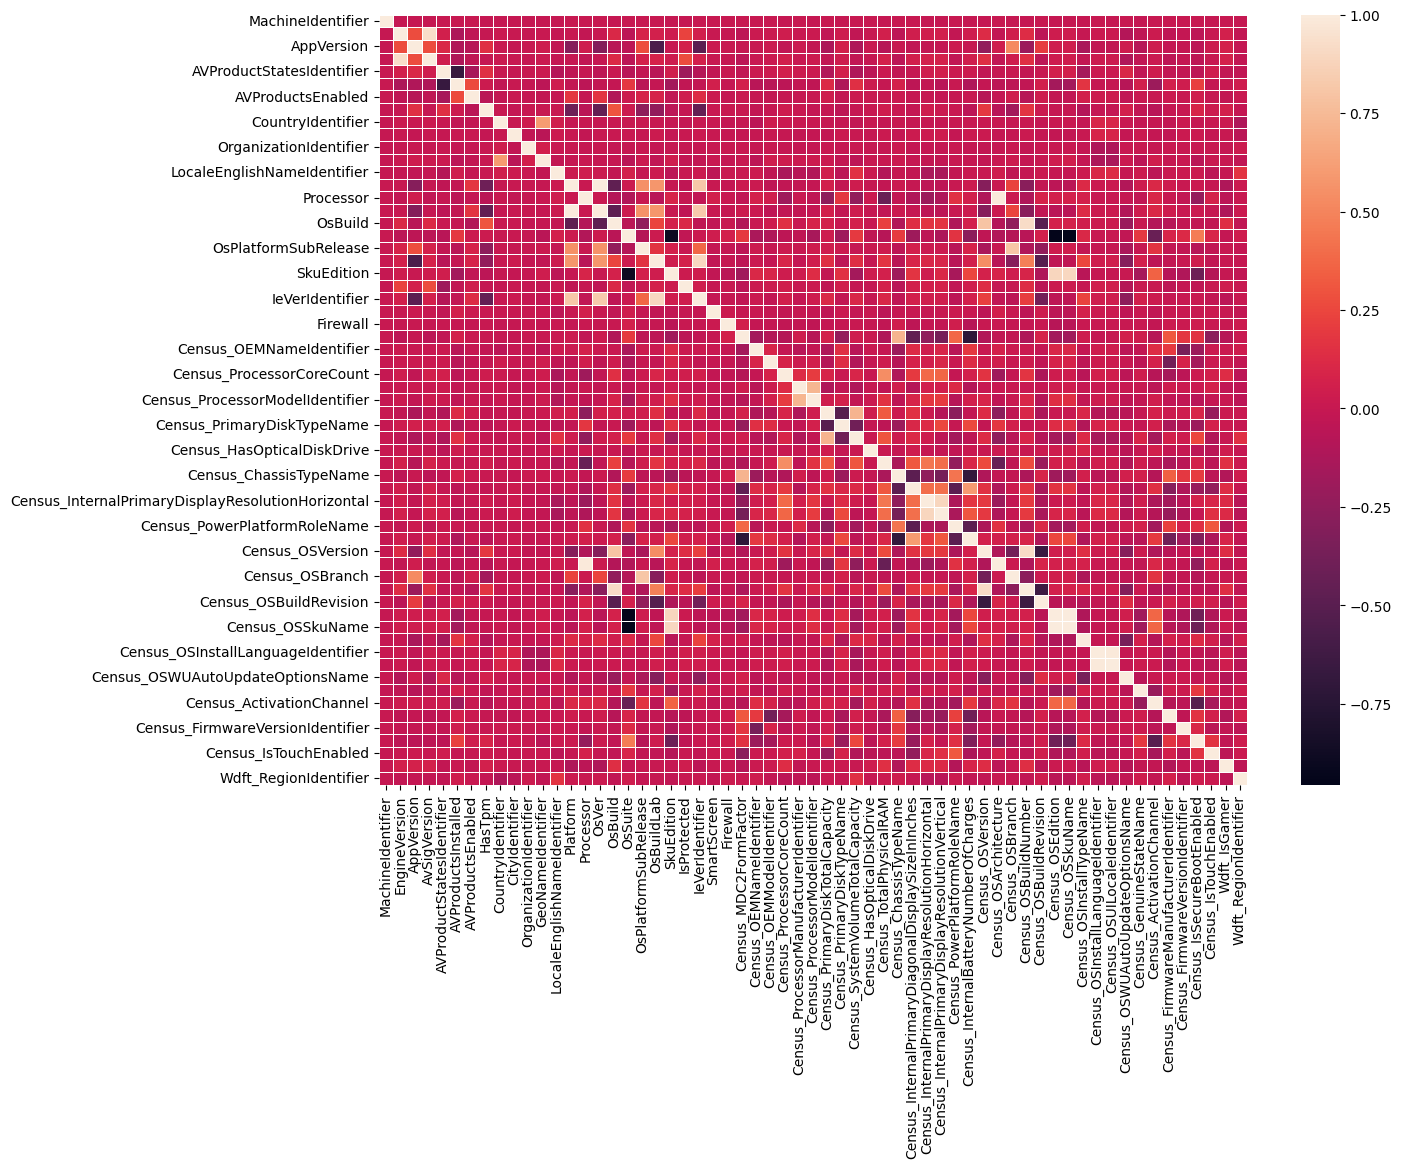

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.drop('HasDetections', axis=1).corr(), linewidths=.5)
plt.show()

## Importing Additional Libraries

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost --quiet
from xgboost import XGBClassifier

from sklearn import tree

## Data processing

In [ ]:
# Split dataset into features and target variable
X = data.drop('HasDetections', axis=1)
y = data['HasDetections']

In [ ]:
#Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=99)

In [ ]:
print(f'train samples: {len(X_train)}\ntest samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 80162
test samples: 20041
target proportion: 0.4997


# ***Concordance index***





In [ ]:
# Concordance Model
def concordance_index(y_true, y_pred):
    """
    Calculate the concordance index (C-index).

    Parameters:
        y_true (array-like): True labels (0 or 1).
        y_pred (array-like): Predicted probabilities of class 1.

    Returns:
        float: Concordance index (C-index).
    """
    n = len(y_true)
    concordant_pairs = 0
    discordant_pairs = 0

    if len(y_test) != len(y_pred):
        raise ValueError("y_test and y_pred must have the same length")

    # Convertissez y_true et y_pred en tableaux numpy
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)


    for i in range(n):
        for j in range(i+1, n):
            # Check if the predicted probabilities are concordant or discordant
            if (y_true[i] < y_true[j]) == (y_pred[i] < y_pred[j]):
                concordant_pairs += 1
            else:
                discordant_pairs += 1

    # Calculate the concordance index
    c_index = concordant_pairs / (concordant_pairs + discordant_pairs)

    return c_index

# ***Decision Tree model training***

In [ ]:
# Train the model now using random values
decision_tree_model = DecisionTreeClassifier(min_samples_split=300,
                                            max_depth=8,
                                            random_state=99).fit(X_train,y_train)

In [ ]:
# Evaluate the model
y_pred = decision_tree_model.predict(X_test)
train_accuracy = accuracy_score(decision_tree_model.predict(X_train),y_train)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")



print("Model Evaluation Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
Train Accuracy: 0.6218
Test Accuracy: 0.6160
Precision: 0.6160
Recall: 0.6160
F1-Score: 0.6160


### **Now let's tune the decision tree algorithm**

In [ ]:
# Define the hyperparameters grid
param_grid = {
    'min_samples_split': [100, 500, 1000, 1500],
    'max_depth': [5, 8, 10, 12]
}

# Initialize the DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=99)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 1000}


In [ ]:
# Train the model with the best hyperparameters
decision_tree_model = DecisionTreeClassifier(**best_params, random_state=99)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=1000, random_state=99)

In [ ]:
# Evaluate the model
y_pred = decision_tree_model.predict(X_test)
train_accuracy = accuracy_score(decision_tree_model.predict(X_train),y_train)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")




print("Model Evaluation Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
Train Accuracy: 0.6255
Test Accuracy: 0.6109
Precision: 0.6109
Recall: 0.6109
F1-Score: 0.6109


  Interpretation : As shown above we have the same metrics values implying atfer tuning the model

**Evaluating the concordance after the tuning**

In [ ]:
# Call the concordance function for our decision tree model
concordance_decision_tree = concordance_index(y_test, y_pred)
print("Concordance Score:", concordance_decision_tree)


Concordance Score: 0.6859821298473857


# ***Random Forest model training***

In [ ]:
# Train the model now using values

random_forest_model = RandomForestClassifier(n_estimators = 300,
                                             max_depth = 8,
                                             min_samples_split = 200).fit(X_train,y_train)

In [ ]:
# Evaluate the model
y_pred = random_forest_model.predict(X_test)
train_accuracy = accuracy_score(random_forest_model.predict(X_train),y_train)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")




print("Model Evaluation Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
Train Accuracy: 0.6267
Test Accuracy: 0.6198
Precision: 0.6198
Recall: 0.6198
F1-Score: 0.6198


## **Tuning the Random forest model**

In [ ]:
# Define the hyperparameters grid
param_grid = {
    #'n_estimators': [100, 200, 300],
     #max_depth":  [5, 10, 20],
    'min_samples_split' :[2, 5, 10]
}

# Initialize the RandomForestClassifier with fixed max_depth and min_samples_split
random_forest_model = RandomForestClassifier(n_estimators=200, min_samples_split=5, random_state=99)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'min_samples_split': 5}


In [ ]:
# Train the model now using the best values

random_forest_model = RandomForestClassifier(n_estimators = 200,
                                             max_depth = 20,
                                             min_samples_split = 5).fit(X_train,y_train)

In [ ]:
# Evaluate the model
y_pred = random_forest_model.predict(X_test)
train_accuracy = accuracy_score(random_forest_model.predict(X_train),y_train)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")




print("Model Evaluation Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
Train Accuracy: 0.9371
Test Accuracy: 0.6303
Precision: 0.6303
Recall: 0.6303
F1-Score: 0.6303


Given that the training accuracy stands at 0.9371, it suggests a potential occurrence of overfitting in the model.



In [ ]:
# Call the concordance function for our random forest model after tuning the model
concordance_random_forest = concordance_index(y_test, y_pred)
print("Random Forest Concordance:", concordance_random_forest)

Random Forest Concordance: 0.6885746644528418


# ***XGboost training model***

In [ ]:
n = int(len(X_train) * 0.8)     #Use 80% to train and 20% to evaluate

X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

# Let's train the model on large number of estimators cause it will stop when the cost function stops decreasing
xgb_model = XGBClassifier(n_estimators = 300, learning_rate = 1.25, verbosity = 1, random_state = 99)
xgb_model.fit(X_train_fit, y_train_fit, eval_set = [(X_train_eval, y_train_eval)], early_stopping_rounds = 50)
# Here we must pass a list to the eval_set, because you can have several different tuples ov eval sets. The parameter
# early_stopping_rounds is the number of iterations that it will wait to check if the cost function decreased or not.
# If not, it will stop and get the iteration that returned the lowest metric on the eval set.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.65163
[1]	validation_0-logloss:0.65367
[2]	validation_0-logloss:0.65526
[3]	validation_0-logloss:0.65861
[4]	validation_0-logloss:0.66270
[5]	validation_0-logloss:0.66399
[6]	validation_0-logloss:0.66554
[7]	validation_0-logloss:0.66877
[8]	validation_0-logloss:0.67214
[9]	validation_0-logloss:0.67437
[10]	validation_0-logloss:0.67697
[11]	validation_0-logloss:0.68012
[12]	validation_0-logloss:0.68375
[13]	validation_0-logloss:0.68629
[14]	validation_0-logloss:0.69027
[15]	validation_0-logloss:0.69239
[16]	validation_0-logloss:0.69706
[17]	validation_0-logloss:0.69864
[18]	validation_0-logloss:0.70138
[19]	validation_0-logloss:0.70420
[20]	validation_0-logloss:0.70737
[21]	validation_0-logloss:0.71104
[22]	validation_0-logloss:0.71293
[23]	validation_0-logloss:0.71585
[24]	validation_0-logloss:0.71854
[25]	validation_0-logloss:0.72078
[26]	validation_0-logloss:0.72280
[27]	validation_0-logloss:0.72543
[28]	validation_0-logloss:0.72682
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=99, ...)

In [ ]:
# Evaluate the model
y_pred = xgb_model.predict(X_test)
train_accuracy = accuracy_score(xgb_model.predict(X_train),y_train)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")


print("Model Evaluation Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
Train Accuracy: 0.6143
Test Accuracy: 0.6111
Precision: 0.6111
Recall: 0.6111
F1-Score: 0.6111


### **Tuning the XGBOOST Model**

In [ ]:
# Define the XGBoost classifier
xgb_model = XGBClassifier(random_state=99)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50,100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7, 8, 10, 12]
}

# Train the model using the best parameters found
best_params = grid_search.best_params_
best_xgb_model = XGBClassifier(**best_params, random_state=99, n_jobs=5)
best_xgb_model.fit(X_train, y_train,verbose=False)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:53:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_samples_split=1000, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=5, num_parallel_tree=None, ...)

In [ ]:
# Evaluate the model
y_pred = best_xgb_model.predict(X_test)
train_accuracy = accuracy_score(best_xgb_model.predict(X_train),y_train)
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="micro")
recall = recall_score(y_test, y_pred, average="micro")
f1 = f1_score(y_test, y_pred, average="micro")


print("Model Evaluation Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Evaluation Metrics:
Train Accuracy: 0.9461
Test Accuracy: 0.6151
Precision: 0.6151
Recall: 0.6151
F1-Score: 0.6151


In [ ]:
# Call the concordance function for our XGBoost model after tuning the model
concordance_XGBoost = concordance_index(y_test, y_pred)
print("XGBoost Concordance:", concordance_XGBoost)

XGBoost Concordance: 0.6885746644528418


### Best Models Accuracy Comparison

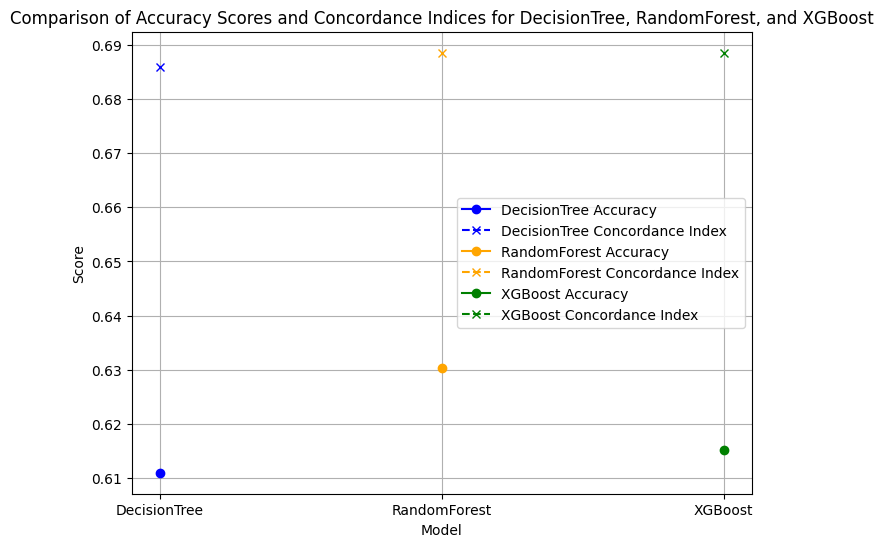

In [ ]:
models = ['DecisionTree', 'RandomForest', 'XGBoost']

accuracies = [
    accuracy_score(decision_tree_model.predict(X_test), y_test),
    accuracy_score(random_forest_model.predict(X_test), y_test),
    accuracy_score(best_xgb_model.predict(X_test), y_test)
]

c_indices = [concordance_decision_tree,
             concordance_random_forest,
             concordance_XGBoost]

plt.figure(figsize=(8, 6))

# Plot accuracy scores and concordance indices on the same graph
for i, model in enumerate(models):
    plt.plot(model, accuracies[i], marker='o', color=colors[i], label=f'{model} Accuracy')
    plt.plot(model, c_indices[i], marker='x', color=colors[i], linestyle='dashed', label=f'{model} Concordance Index')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Accuracy Scores and Concordance Indices for DecisionTree, RandomForest, and XGBoost')
plt.legend()
plt.grid(True)
plt.show()

### All models exhibit similar performance based on the test accuracy, precision, recall, and F1-score metrics. However, the decision tree model has the lowest accuracy among the three models, indicating that it may be the least reliable in making predictions. The XGBoost Model and the Random Forest model show the highest train accuracy, suggesting that it might be overfitting the training data. The Random Forest, with its highest test accuracy among the three, appears to strike a better balance between performance and generalization.

### Considering both the individual model performances and the combined interpretation, Random Forest emerges as the best-performing model for this task.


### A Concordance Index (C-index) of 0.688 suggests moderate discriminative power for Microsoft Malware Detection models. Further optimization may be necessary to enhance model performance, considering the complex nature of malware detection tasks. Comparison with industry benchmarks and domain-specific expertise can provide valuable insights into the effectiveness of the models.

## ***Bonus***
### The Input Features importance in the prediction of the target variable (HasDetections)

### Decision Tree

In [ ]:
importances = decision_tree_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame to store feature importance scores and feature names
feature_importance_df = pd.DataFrame(columns=["Feature Name", "Importance"])

# Populate the DataFrame with feature importance scores and feature names
for i, idx in enumerate(indices):
    feature_importance_df.loc[i] = [X_train.columns[idx], importances[idx]*100]

# Display the DataFrame sorted by importance scores
print(feature_importance_df)

                                         Feature Name  Importance
0                                         SmartScreen   30.516259
1                                 AVProductsInstalled   16.550200
2                                        AvSigVersion   13.223859
3                           AVProductStatesIdentifier    7.821258
4                     Census_PrimaryDiskTotalCapacity    6.820512
5                            Census_OSInstallTypeName    4.270590
6   Census_InternalPrimaryDiagonalDisplaySizeInInches    3.907411
7                                        Wdft_IsGamer    2.194352
8                                    Census_OSVersion    1.877843
9                                          AppVersion    1.581544
10                        Census_OSUILocaleIdentifier    1.430600
11                            Census_TotalPhysicalRAM    1.035833
12                             Census_ChassisTypeName    0.987439
13                           Census_OEMNameIdentifier    0.780329
14        

### Random Forest

In [ ]:
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame to store feature importance scores and feature names
feature_importance_df = pd.DataFrame(columns=["Feature Name", "Importance"])

# Populate the DataFrame with feature importance scores and feature names
for i, idx in enumerate(indices):
    feature_importance_df.loc[i] = [X_train.columns[idx], importances[idx]*100]

# Display the DataFrame sorted by importance scores
print(feature_importance_df)

                                         Feature Name  Importance
0                                        AvSigVersion    5.574818
1                                         SmartScreen    5.254487
2                                   MachineIdentifier    4.422112
3                    Census_SystemVolumeTotalCapacity    4.308524
4                                      CityIdentifier    4.234067
5                    Census_FirmwareVersionIdentifier    4.029430
6                           Census_OEMModelIdentifier    3.941966
7                     Census_ProcessorModelIdentifier    3.849466
8                           AVProductStatesIdentifier    3.731770
9                                   CountryIdentifier    3.172301
10  Census_InternalPrimaryDiagonalDisplaySizeInInches    2.957515
11                        LocaleEnglishNameIdentifier    2.682955
12                                  GeoNameIdentifier    2.630634
13                             Census_OSBuildRevision    2.629849
14        

### XGBoost

In [ ]:
importances = best_xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame to store feature importance scores and feature names
feature_importance_df = pd.DataFrame(columns=["Feature Name", "Importance"])

# Populate the DataFrame with feature importance scores and feature names
for i, idx in enumerate(indices):
    feature_importance_df.loc[i] = [X_train.columns[idx], importances[idx]*100]

# Display the DataFrame sorted by importance scores
print(feature_importance_df)

                                         Feature Name  Importance
0                                         SmartScreen    8.289344
1                                 AVProductsInstalled    8.083647
2                                              HasTpm    2.172540
3                           AVProductStatesIdentifier    2.146430
4                                         IsProtected    2.137830
5                                       EngineVersion    2.112385
6                               Census_OSArchitecture    2.005397
7                         Census_OSUILocaleIdentifier    1.864607
8                                    Census_OSSkuName    1.818154
9                             Census_TotalPhysicalRAM    1.805283
10                           Census_OSInstallTypeName    1.798480
11                                       Wdft_IsGamer    1.789126
12                                          Processor    1.743474
13                                         AppVersion    1.632995
14        

### This method helps you figure out how much each column is used across all the models you've studied. It's interesting to note that the models don't all rely on the same columns for their predictions; they each have their own favorites.